In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the Boston Housing dataset
# Replace with local dataset path if needed
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
# Step 1: Select features and target variable
# Using 'rm' as the feature for simplicity in visualization. You can add more features if needed.
X = data[['rm']]
y = data['medv']

In [5]:
# Step 2: Transform features into polynomial terms
degree = 2  # Degree of the polynomial (change to 3 or higher if needed)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [6]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Train the Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

In [9]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Model Performance:
Mean Squared Error: 35.36977373731789
R-squared Score: 0.5176878620868068


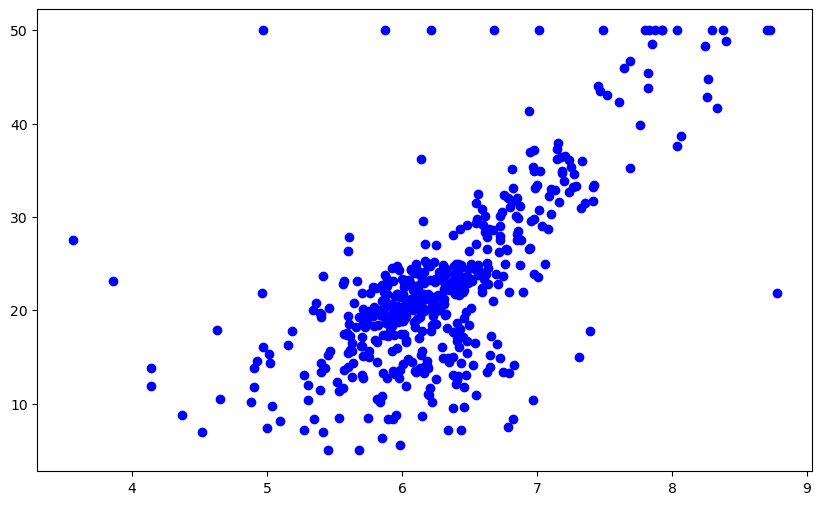

In [10]:
# Step 7: Visualize the Polynomial Regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X['rm'], y, color='blue', label='Actual Prices')

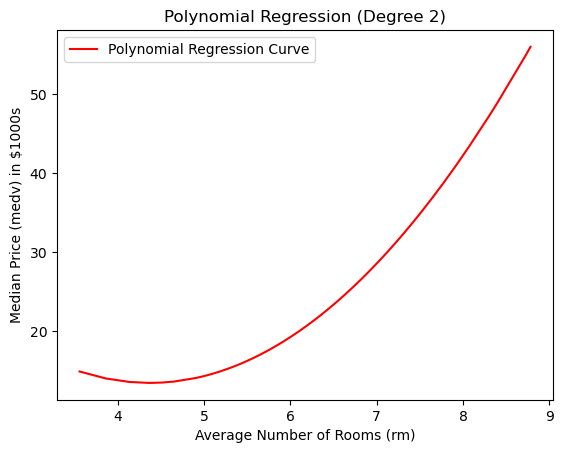

In [11]:
# Sort values for a smooth curve
X_sorted, y_pred_sorted = zip(*sorted(zip(X['rm'], model.predict(poly_features.transform(X)))))
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Regression Curve')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Price (medv) in $1000s')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()

In [12]:
#q2

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [14]:
# Load the dataset
# Replace 'employee_data.csv' with your local path to the dataset
data = pd.read_csv('employee_data.csv')

In [15]:
# Display the first few rows of the dataset
print(data.head())

   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397


In [16]:
# Check for missing values
print(data.isnull().sum())

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64


In [17]:
# Step 2: Preprocess the data
# Drop missing values (if any)
data = data.dropna()

In [18]:
# Select features for clustering (Experience and Salary)
X = data[['Experience (Years)', 'Salary']]

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
silhouette_scores = []

In [21]:
# Testing k values from 2 to 10
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate inertia
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [22]:
# Plotting the Elbow Method
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

([<matplotlib.axis.XTick at 0x16c10045ad0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

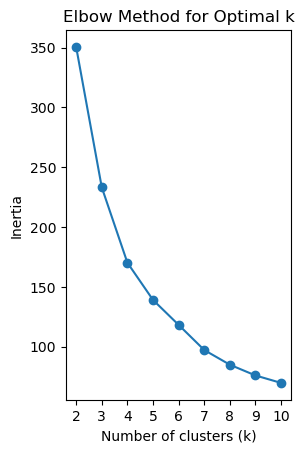

In [23]:
# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)

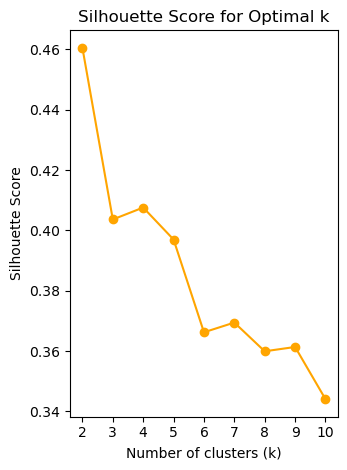

In [24]:
# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [25]:
# Choose optimal k based on elbow and silhouette score
optimal_k = 4  # Replace this with your analysis result from the plots

In [26]:
# Step 4: Fit K-means model with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display clustered data
print("\nClustered Data:")
print(data.head())




Clustered Data:
   ID Gender  Experience (Years)               Position  Salary  Cluster
0   1      F                   4        DevOps Engineer  109976        2
1   2      M                   6        DevOps Engineer  120088        0
2   3      M                  17          Web Developer  181301        1
3   4      M                   7  Systems Administrator   77530        2
4   5      F                  13  Systems Administrator  152397        3


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


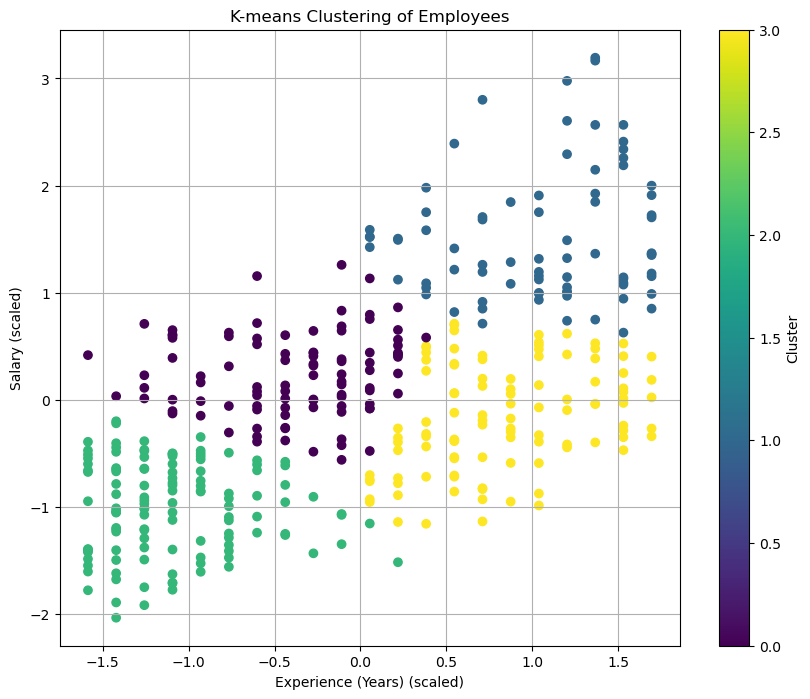

In [27]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering of Employees')
plt.xlabel('Experience (Years) (scaled)')
plt.ylabel('Salary (scaled)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()